#### Import libraries

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from time import time

In [3]:
credit_card = pd.read_csv(r'_Credit_Card_afterFeatureSelection.csv')

# remove additional index column 
credit_card = credit_card.drop(['Unnamed: 0'], axis=1)

credit_card

,GENDER,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,0.012658,2,1,24,2,2,-1,-1,0,0,0.122080,0.000000,0.005698,0.000000,0.000000,0.000000,0.000000,1
1,2,0.139241,2,2,26,-1,2,0,0,0,2,0.129971,0.000000,0.008269,0.010753,0.012048,0.000000,0.021277,1
2,2,0.101266,2,2,34,0,0,0,0,0,0,0.156644,0.017250,0.012404,0.010753,0.012048,0.012341,0.053191,0
3,2,0.050633,2,1,37,0,0,0,0,0,0,0.190369,0.022728,0.016696,0.012903,0.013253,0.013192,0.010638,0
4,1,0.050633,2,1,57,-1,0,-1,0,0,0,0.172584,0.022728,0.303332,0.107527,0.108434,0.008503,0.007223,0
5,1,0.050633,1,2,37,0,0,0,0,0,0,0.168855,0.028410,0.015009,0.007065,0.012048,0.012341,0.008511,0
6,2,0.113924,2,2,23,0,-1,-1,0,0,-1,0.122613,0.004318,0.004970,0.000000,0.007000,0.020819,0.016404,0
7,2,0.164557,3,1,28,0,0,2,0,0,0,0.151531,0.037830,0.000000,0.004645,0.012048,0.012341,0.010638,0
8,1,0.012658,3,2,35,0,0,0,0,-1,-1,0.122080,0.000000,0.000000,0.000000,0.156711,0.013846,0.000000,0
9,2,0.240506,3,2,34,0,0,2,0,0,-1,0.128141,0.026205,0.000099,0.000538,0.003614,0.046130,0.000702,0


In [4]:
# Define X and y 
y = credit_card.iloc[:,18] 
X = credit_card.iloc[:,0:18] 

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_predict = xgbc.predict(X_valid)

# calculation of accuracy score   
print("Train Accuracy : ", accuracy_score(y_train, xgbc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy :  0.8237910434744691
Test Accuracy  :  0.8137425880711545
F1 Score  ::  0.46706586826347307


### Optimizing Model Parameters

In [5]:
# Look at the parameters used by our current classifier
print('Parameters currently in use:\n')
print(xgbc.get_params())

Parameters currently in use:

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


#### n_estimators

In [6]:
def accuracy_get(n_estimator, X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(n_estimators = n_estimator)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_predict)
    return(accuracy)

for n_estimator in [100,150,200,250,300]:
    accuracy = accuracy_get(n_estimator, X_train, X_valid, y_train, y_valid)
    print("n_estimator: %d  \t\t Accuracy Score:  %s" %(n_estimator, accuracy))

n_estimator: 100  		 Accuracy Score:  0.8137425880711545
n_estimator: 150  		 Accuracy Score:  0.8146145797000349
n_estimator: 200  		 Accuracy Score:  0.8133937914196023
n_estimator: 250  		 Accuracy Score:  0.8133937914196023
n_estimator: 300  		 Accuracy Score:  0.8126961981164981


n_estimator = 150 gives the highest accuracy 

#### max_depth

In [7]:
def accuracy_get(max_depth, X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_predict)
    return(accuracy)

max_depth = 3

while max_depth in range(10):
    accuracy = accuracy_get(max_depth, X_train, X_valid, y_train, y_valid)
    print("max_depth: %d  \t\t Accuracy Score:  %s" %(max_depth, accuracy))
    max_depth += 1

max_depth: 3  		 Accuracy Score:  0.8137425880711545
max_depth: 4  		 Accuracy Score:  0.8161841646320195
max_depth: 5  		 Accuracy Score:  0.8153121730031392
max_depth: 6  		 Accuracy Score:  0.814788978025811
max_depth: 7  		 Accuracy Score:  0.8086850366236484
max_depth: 8  		 Accuracy Score:  0.8114754098360656
max_depth: 9  		 Accuracy Score:  0.8118242064876178


max_depth = 4 gives the highest accuracy

#### learning_rate 

In [9]:
def accuracy_get(learning_rate, n_estimator, X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(learning_rate = learning_rate)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_predict)
    return(accuracy)

n_estimator = 100

for learning_rate in [0.1,0.08,0.05,0.02]:
    accuracy = accuracy_get(learning_rate, n_estimator, X_train, X_valid, y_train, y_valid)
    print("learning_rate: %.2f  \t\t n_estimator:  %d  \t\t Accuracy Score:  %s" %(learning_rate, n_estimator, accuracy))
    n_estimator += 50

learning_rate: 0.10  		 n_estimator:  100  		 Accuracy Score:  0.8137425880711545
learning_rate: 0.08  		 n_estimator:  150  		 Accuracy Score:  0.8135681897453785
learning_rate: 0.05  		 n_estimator:  200  		 Accuracy Score:  0.8151377746773631
learning_rate: 0.02  		 n_estimator:  250  		 Accuracy Score:  0.8130449947680503


The combination learning rate = 0.05 and n_estimator = 200 gives the highest accuracy.

#### subsample

In [10]:
def accuracy_get(subsample, X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(subsample = subsample)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_predict)
    return(accuracy)

for subsample in [1.00,0.95,0.9,0.85,0.8]:
    accuracy = accuracy_get(subsample, X_train, X_valid, y_train, y_valid)
    print("subsample: %.2f  \t\t Accuracy Score:  %s" %(subsample, accuracy))

subsample: 1.00  		 Accuracy Score:  0.8137425880711545
subsample: 0.95  		 Accuracy Score:  0.8137425880711545
subsample: 0.90  		 Accuracy Score:  0.814788978025811
subsample: 0.85  		 Accuracy Score:  0.8151377746773631
subsample: 0.80  		 Accuracy Score:  0.8130449947680503


subsample = 0.85 gives the highest accuracy.

#### cosample_bytree

In [11]:
def accuracy_get(colsample_bytree, X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(colsample_bytree =colsample_bytree)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_predict)
    return(accuracy)

for colsample_bytree in [1.00,0.95,0.90,0.85,0.80]:
    accuracy = accuracy_get(colsample_bytree, X_train, X_valid, y_train, y_valid)
    print("colsample_bytree: %.2f  \t\t Accuracy Score:  %s" %(colsample_bytree, accuracy))

colsample_bytree: 1.00  		 Accuracy Score:  0.8137425880711545
colsample_bytree: 0.95  		 Accuracy Score:  0.8144401813742588
colsample_bytree: 0.90  		 Accuracy Score:  0.8137425880711545
colsample_bytree: 0.85  		 Accuracy Score:  0.814963376351587
colsample_bytree: 0.80  		 Accuracy Score:  0.8146145797000349


colsample_bytree = 0.85 gives the highest accuracy.

#### gamma

In [12]:
def accuracy_get(gamma, X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(gamma =gamma)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_predict)
    return(accuracy)

for gamma in [0,1,5]:
    accuracy = accuracy_get(gamma, X_train, X_valid, y_train, y_valid)
    print("gamma: %s  \t\t Accuracy Score:  %s" %(gamma, accuracy))

gamma: 0  		 Accuracy Score:  0.8137425880711545
gamma: 1  		 Accuracy Score:  0.8140913847227067
gamma: 5  		 Accuracy Score:  0.8144401813742588


gamma = 5 gives the highest accuracy.

#### We will be trying out 2 combinations of parameters: (1) n_estimator = 150, max_depth = 4, learning_rate = 0.1, subsample = 0.85, cosample_bytree = 0.85, gamma = 5 (2) n_estimator = 200, max_depth = 4, learning_rate = 0.05, subsample = 0.85, cosample_bytree = 0.85, gamma = 5

Combination 1

In [14]:
xgbc = XGBClassifier(n_estimator = 150, max_depth = 4, learning_rate = 0.1, subsample = 0.85, cosample_bytree = 0.85, gamma = 5)
xgbc.fit(X_train, y_train)
y_predict = xgbc.predict(X_valid)

# calculation of accuracy score
print("Train Accuracy : ", accuracy_score(y_train, xgbc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy :  0.8267125975668251
Test Accuracy  :  0.8154865713289152
F1 Score  ::  0.47519841269841273


Combination 2

In [15]:
xgbc = XGBClassifier(n_estimator = 200, max_depth = 4, learning_rate = 0.05, subsample = 0.85, cosample_bytree = 0.85, gamma = 5)
xgbc.fit(X_train, y_train)
y_predict = xgbc.predict(X_valid)

# calculation of accuracy score
print("Train Accuracy : ", accuracy_score(y_train, xgbc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy :  0.8252300178781669
Test Accuracy  :  0.8144401813742588
F1 Score  ::  0.4695912263210369


Combination 1 gives a higher accuracy and F1 score. Hence, we will be using the parameters in Combination 1.

### Feature reduction to further improve model's performance

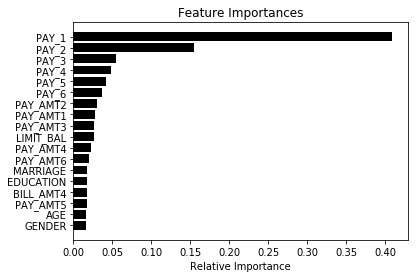

GENDER : 0.015869737
LIMIT_BAL : 0.025893688
EDUCATION : 0.017511187
MARRIAGE : 0.01760964
AGE : 0.016648427
PAY_1 : 0.4088451
PAY_2 : 0.15503779
PAY_3 : 0.05454022
PAY_4 : 0.048149154
PAY_5 : 0.04167579
PAY_6 : 0.03606416
BILL_AMT4 : 0.01749435
PAY_AMT1 : 0.027711632
PAY_AMT2 : 0.030493468
PAY_AMT3 : 0.026040174
PAY_AMT4 : 0.02288206
PAY_AMT5 : 0.017159294
PAY_AMT6 : 0.020374099


In [17]:
xgbc = XGBClassifier(n_estimator = 150, max_depth = 4, learning_rate = 0.1, subsample = 0.85, cosample_bytree = 0.85, gamma = 5)
xgbc.fit(X_train, y_train)
y_predict = xgbc.predict(X_valid)

features = ['GENDER', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

importances = xgbc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

index = 0
for index in range(18):
    print(features[index], ":", importances[index])
    index += 1

#### Drop AGE (lowest relative importance value)

In [18]:
credit_card1 = credit_card.drop(['AGE'], axis=1)

# Define X and y 
y = credit_card1.iloc[:,17] 
X = credit_card1.iloc[:,0:17] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# train the model
xgbc = XGBClassifier(n_estimator = 150, max_depth = 4, learning_rate = 0.1, subsample = 0.85, cosample_bytree = 0.85, gamma = 5)
xgbc.fit(X_train, y_train)
y_predict = xgbc.predict(X_valid)

# calculation of accuracy score
print("Train Accuracy :", accuracy_score(y_train, xgbc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy : 0.8258404918676143
Test Accuracy  :  0.8140913847227067
F1 Score  ::  0.47017892644135184


#### Since a drop of accuracy and F1 score is observed, we decided to not drop any columns.

### Resampling to improve F1 score

In [19]:
# Define X and y 
y = credit_card.iloc[:,18] 
X = credit_card.iloc[:,0:18] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# obtain the training set 
X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index()
X_train = X_train.drop(['index'],axis=1)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train = y_train.drop(['index'],axis=1)

training_set = pd.concat([X_train, y_train], axis=1)
training_set

,GENDER,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,0.291139,2,1,42,-1,-1,-1,-1,-1,-1,0.123604,0.000000,0.002613,0.006796,0.000000,0.003900,0.010085,0
1,2,0.164557,2,1,26,0,0,0,2,2,2,0.198618,0.227278,0.024899,0.000000,0.036145,0.000000,0.053191,0
2,2,0.443038,1,2,30,0,0,0,0,0,0,0.122080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1,0.025316,2,1,49,0,0,2,2,0,0,0.160407,0.041933,0.008269,0.000000,0.007096,0.009330,0.015957,0
4,2,0.227848,2,1,34,1,0,0,0,0,0,0.122036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,2,0.025316,2,1,25,2,2,2,2,2,2,0.186952,0.043183,0.011577,0.000000,0.018072,0.028384,0.011851,1
6,1,0.177215,3,2,43,-1,-1,-1,-1,0,0,0.143736,0.020875,0.029158,0.096753,0.001554,0.000000,0.000000,0
7,2,0.291139,2,1,35,-1,2,-1,-1,-1,-1,0.122716,0.000000,0.002183,0.002839,0.003181,0.005109,0.002809,1
8,1,0.050633,2,1,32,1,3,2,2,2,2,0.159066,0.000000,0.016539,0.000000,0.016867,0.000000,0.017021,1
9,2,0.468354,1,1,43,0,0,0,0,0,0,0.366458,0.068183,0.041347,0.053763,0.060241,0.061704,0.053191,0


In [20]:
training_set['default payment next month'].value_counts()

0    17789
1     5144
Name: default payment next month, dtype: int64

In [22]:
# Separate majority and minority classes
training_set_majority = training_set[training_set['default payment next month'] == 0]
training_set_minority = training_set[training_set['default payment next month'] == 1]

# Upsample minority class
training_set_minority_upsampled = resample(training_set_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17789,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
credit_card_upsampled = pd.concat([training_set_majority, training_set_minority_upsampled])
 
# Display new class counts
credit_card_upsampled['default payment next month'].value_counts()

1    17789
0    17789
Name: default payment next month, dtype: int64

In [23]:
# Define X and y 
y = credit_card.iloc[:,18] 
X = credit_card.iloc[:,0:18] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# train the model
xgbc = XGBClassifier(n_estimator = 150, max_depth = 4, learning_rate = 0.1, subsample = 0.85, cosample_bytree = 0.85, gamma = 5)
xgbc.fit(X_train, y_train)
y_predict = xgbc.predict(X_valid)

# calculation of accuracy score
print("Train Accuracy :", accuracy_score(y_train, xgbc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy : 0.8267125975668251
Test Accuracy  :  0.8154865713289152
F1 Score  ::  0.47519841269841273


Slight improvement in both test accuracy and F1 score.

### Model Evaluation

In [24]:
print("Train Accuracy : ", accuracy_score(y_train, xgbc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy :  0.8267125975668251
Test Accuracy  :  0.8154865713289152
F1 Score  ::  0.47519841269841273


In [27]:
start = time()
xgbc = XGBClassifier(max_depth = 4, learning_rate = 0.02, n_estimators = 250, subsample = 0.95, cosample = 0.90, gamma =1)
xgbc.fit(X_train, y_train)
end = time()
print("Trained model in {:.4f} seconds".format(end - start))

Trained model in 9.0209 seconds


In [28]:
start = time()
y_predict = xgbc.predict(X_valid)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start))

Made predictions in 0.0659 seconds.


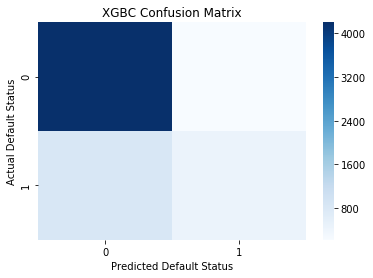

Predicted     0    1
Actual              
0          4201  220
1           847  466


In [29]:
ax= plt.subplot()
confusion_matrix = pd.crosstab(y_valid, y_predict, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, cmap="Blues")
    
#change the labels
ax.set_xlabel('Predicted Default Status')
ax.set_ylabel('Actual Default Status')
ax.set_title('XGBC Confusion Matrix')
# save the figure for use in ppt
plt.savefig('XGBC_confusion_matrix.jpg')
plt.show()

print(confusion_matrix)

In [35]:
TN = 4201
TP = 466
FN = 847
FP = 220

total = TN + TP + FN + FP
actual0 = TN + FP
actual1 = TP + FN
predicted1 = TP + FP

print("Accuracy: ", (TP+TN)/total)
print("Misclassification Rate: ",(FP+FN)/total)
print("True Positive Rate: ",TP/actual1)
print("False Positive Rate: ",FP/actual0)
print("True Negative Rate (Specificity): ",TN/actual0)
print("Precision: ", TP/predicted1)
print("Prevalence: ", actual1/total)

print()
print(classification_report(y_valid, y_predict))

Accuracy:  0.8139169863969306
Misclassification Rate:  0.18608301360306942
True Positive Rate:  0.3549124143183549
False Positive Rate:  0.049762497172585386
True Negative Rate (Specificity):  0.9502375028274146
Precision:  0.6793002915451894
Prevalence:  0.22898500174398326

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4421
           1       0.68      0.35      0.47      1313

   micro avg       0.81      0.81      0.81      5734
   macro avg       0.76      0.65      0.68      5734
weighted avg       0.80      0.81      0.79      5734



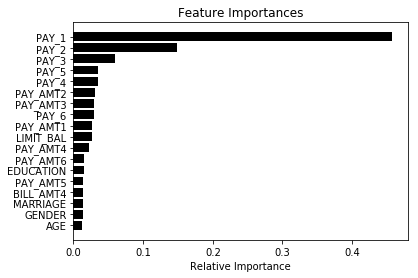

In [38]:
features = ['GENDER', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

importances = xgbc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('XGBC_feature_importance.jpg', bbox_inches="tight")
plt.show()

Top 5 Features: PAY_1, PAY_2, PAY_3, PAY_5, PAY_4

Based on this model, PAY_2, repayment status of the month before (for August) has a significantly greater influence on the default payment status of the following month (for October) than all other factors.